# Polynomial Regression Example with K-Fold and Leave One Out Cross Validation Solution

We have a small dataset with 100 rows and 2 columns. This is a nonlinear regression example and we will use polynomial regression. And also, when we use polynomial regression, we have to specify **degree** value. In this example, we will find which degree is optimum error value and then, we will evaluate the degree by the result.

In [616]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [617]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold,LeaveOneOut
from sklearn.metrics import mean_squared_error,r2_score

In [618]:
#data is a linear regression model
data=pd.read_csv("datalar/Exercise1DataSet.csv")
data

,x,y
0,-4.809264,-92.911272
1,-4.722680,-98.506658
2,-3.852326,-63.212666
3,-3.687668,-51.036538
4,-3.602674,-54.784580
...,...,...
95,6.890595,39.282364
96,7.118811,49.384561
97,7.178848,51.564875
98,7.942389,85.676290


In [619]:
#data.info()

In [620]:
#data.describe()

In [621]:
x=np.array(data["x"].values.reshape(-1,1))
#x

In [622]:
y=np.array(data["y"].values)
#y

*In polynomial regression, we cannot fit it directly like normal linear regression. For this reason, it is necessary to do preprocessing first. After this stage, we perform pre-processing according to the desired degree and create a table with as many independent variables as the number of degrees. Now we can create an equation by performing linear regression with the fit process. At this stage, we train the train to create an equation from the train, valid and test data we used in the train test split stage. Then, we have our valid data predicted just like the test data set. However, there is an important point: we act as if we do not have test data, that is, we store it (it will be used at the last stage).*

In [623]:
"""
create a function to calculate polinomial regression
"""

def create_pol_regression(degree):
    poly_features=PolynomialFeatures(degree=degree,include_bias=False)
    
    #train ve valid için fit transform ile bağımsız değişkenler oluştur(ön işleme)
    x_train_poly=poly_features.fit_transform(x_trainv)
    x_valid_poly=poly_features.fit_transform(x_valid)
    
    #yeni bağımsız featurlerden sadece x_train_poly için fit işlemi yapacağız 
    poly_model=LinearRegression()
    poly_model.fit(x_train_poly,y_trainv) #elimizde bir denklem var
    
    #bu aşamada hem train hem de valid için tahminleme yaptıralım
    y_train_pred=poly_model.predict(x_train_poly)
    y_valid_pred=poly_model.predict(x_valid_poly)
    
    #hem train tahmin hem de valid tahmin için scoreları belirleyelim
    mse_train=mean_squared_error(y_trainv,y_train_pred)
    mse_valid=mean_squared_error(y_valid,y_valid_pred)
    
    return(mse_train,mse_valid,degree)

In [624]:
#let's split the data as train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [625]:
len(x_train)

80

In [626]:
len(y_train)

80

In [627]:
len(y_trainv)

64

In the second stage, we will perform Leave One Out cross validation with 2 for loops, and we will use the degree that gives the most optimum validation error that we have determined at this point in the next stages.*

1. for: for degrees

2. for: to break down the data for train and validation

In [628]:
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
LeaveOneOutCV=[] # We added the average of the errors found for each degree

for j in range(1,9):
    LeaveOneOutError=[] #adds each sample point here
    for train_index,validation_index in loo.split(x_train):
        #We separated the data as train and validation as leave one out cross validation
        x_trainv,x_valid=x_train[train_index],x_train[validation_index]
        y_trainv,y_valid=y_train[train_index],y_train[validation_index]
        
        #Let's run our polynomial regression function
        LeaveOneOutError.append(create_pol_regression(j))
        df=pd.DataFrame(LeaveOneOutError,columns=["Train Error","Validation Error","Degree"])
    LeaveOneOutCV.append([df["Validation Error"].mean(),df["Degree"][0]])
LOOCV=pd.DataFrame(LeaveOneOutCV,columns=["Validation Error Mean","Degree"])
    
LOOCV  # best rank error is 3

,Validation Error Mean,Degree
0,522.536143,1
1,615.206270,2
2,10.257541,3
3,12.556636,4
4,15.705177,5
5,34.482614,6
6,19.589947,7
7,48.197852,8


<function matplotlib.pyplot.show(close=None, block=None)>

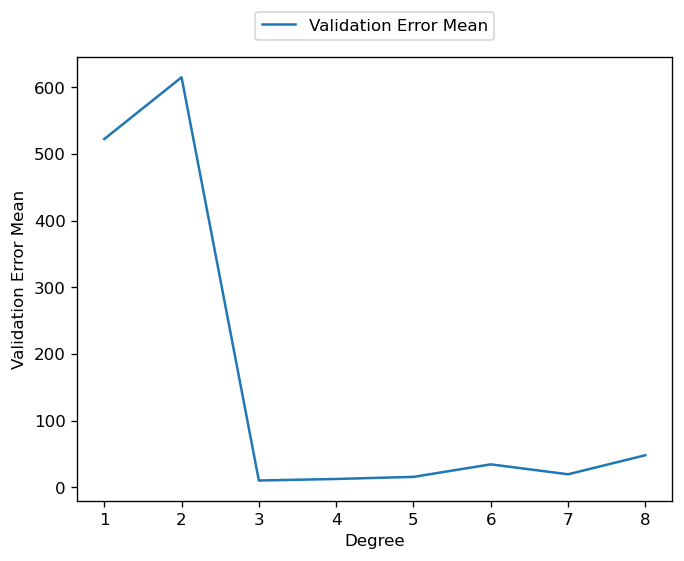

In [629]:
plt.figure(dpi=120)
plt.plot(LOOCV["Degree"].values,LOOCV["Validation Error Mean"].values,label="Validation Error Mean")
plt.xlabel("Degree")
plt.ylabel("Validation Error Mean")
plt.legend(loc="lower center", bbox_to_anchor=(0.5,1.02))
plt.show

In [630]:
best_degree=LOOCV.sort_values(by="Validation Error Mean").iloc[0,1]
#LOOCV=LOOCV.iloc[0]
print(type(LOOCV))
best_degree

<class 'pandas.core.frame.DataFrame'>


3

In [631]:
MSE=[create_pol_regression(degree=best_degree)]
MSE=pd.DataFrame(MSE,columns=["MSE Train","MSE Validation","Degree"])
MSE.set_index("Degree",inplace=True)
MSE

,MSE Train,MSE Validation
Degree,,
3,8.516339,0.689653


In [632]:
#df

***We now know it has 3 degrees. Let's find the scores of our test set over 3 degrees.***

But move forward dynamically. So instead of directly giving 3 as a constant, write a code that gives us the best rank.

***Refit your model on the training set with the selected degree of polynomial and compute the test mean squared error.***

In [633]:
poly_features=PolynomialFeatures(degree=best_degree, include_bias=False)
x_train_poly=poly_features.fit_transform(x_train)
poly_model=LinearRegression()
poly_model.fit(x_train_poly,y_train)
print("Coefficient value:",poly_model.coef_)
print("İntercept values:",poly_model.intercept_)


x_test_poly=poly_features.fit_transform(x_test)
y_test_prediction=poly_model.predict(x_test_poly)
mse_test=mean_squared_error(y_test,y_test_prediction)
print("MSE Test Score:",mse_test)

Coefficient value: [ 0.49548162 -2.04609807  0.41702238]
İntercept values: -2.3541830603701936
MSE Test Score: 9.569802779249255


***Try different degrees of polynomial functions and pick the one that has the smallest 5-fold cross validation mean squared error, and report 5-fold cross validation errors of each polynomial functions.***

In [634]:
kfold=KFold(n_splits=5,shuffle=True, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=5)

Kfold_CV=[] #ortalamasını al
for j in range(1,9):
    KFold_train_valid=[] #train-valid datasetlerinin parçalanmış hali
    Kfold_Errors=[]
    
    for train_index,validation_index in kfold.split(x_train):
        x_trainv,x_valid=X_train[train_index],X_train[validation_index]
        y_trainv,y_valid=Y_train[train_index],Y_train[validation_index]
        
        #KFold_train_valid.append([x_train[train_index],x_train[validation_index]])
        #data=pd.DataFrame(KFold_train_valid,columns=["x train","x valid"])
        
        #tüm derecelerin hatalarını bulalım
        Kfold_Errors.append(create_pol_regression(j))
        Errors=pd.DataFrame(Kfold_Errors,columns=["MSE Training","MSE Validation","Degree"])
        
        
        #her derceye ait hata ortalamalarını bulalım
    Kfold_CV.append([Errors["MSE Validation"].mean(),Errors["Degree"][0]])
df=pd.DataFrame(Kfold_CV,columns=["Validation","Degree"])
        
#data
#Errors
df

,Validation,Degree
0,498.439106,1
1,610.895517,2
2,11.279685,3
3,16.563823,4
4,23.546781,5
5,26.533180,6
6,34.096785,7
7,154.840635,8


<function matplotlib.pyplot.show(close=None, block=None)>

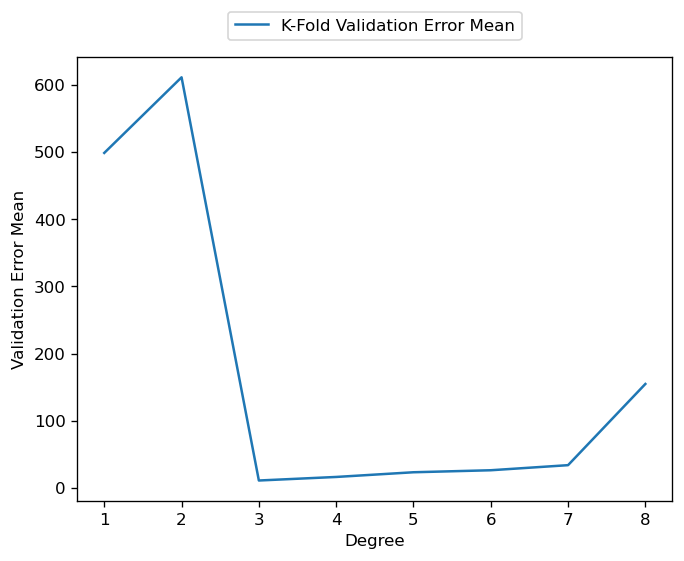

In [635]:
plt.figure(dpi=120)
plt.plot(df["Degree"].values,df["Validation"].values,label="K-Fold Validation Error Mean")
plt.xlabel("Degree")
plt.ylabel("Validation Error Mean")
plt.legend(loc="lower center", bbox_to_anchor=(0.5,1.02))
plt.show

In [636]:
best_min_degree=int(df.sort_values(by="Validation",ascending=True).iloc[0,1])
best_min_degree

3

***Refit your model on the training set with the selected degree of polynomial and compute the test mean squared error and test R2 score.***

In [637]:
poly_features=PolynomialFeatures(degree=best_min_degree, include_bias=False)
X_train_poly=poly_features.fit_transform(X_train)
poly_model=LinearRegression()
poly_model.fit(X_train_poly,Y_train)
print("Coefficient value:",poly_model.coef_)
print("İntercept values:",poly_model.intercept_)


X_test_poly=poly_features.fit_transform(X_test)
Y_test_prediction=poly_model.predict(X_test_poly)
mse_test=mean_squared_error(Y_test,Y_test_prediction)
r2_test_score=r2_score(Y_test,Y_test_prediction)
print("MSE Test Score:",mse_test)
print("R2 Test Score:",r2_test_score)

Coefficient value: [ 0.52644037 -2.08036056  0.41840872]
İntercept values: -1.7598861910294135
MSE Test Score: 7.106966845948219
R2 Test Score: 0.9603145469268793


***Are the degrees of polynomials chosen with LOOCV and 5-fold cross validation same?***

In [638]:
if best_degree==best_min_degree:
    print(f"LOOCV and K-Fold degree result is the same. Chosen degree is {best_degree}")
else:
    print("LOOCV and K-Fold degree result isn't the same.")

LOOCV and K-Fold degree result is the same. Chosen degree is 3
